In [71]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,7)
mpl.rcParams['image.cmap'] = 'inferno'
import cv2
print('OpenCV version used:', cv2.__version__)
from math import *
from skimage import io
from matplotlib import pyplot as plt

from utils import imshow, url_to_image, draw_pts
from utils import assert_ellipse, draw_ellipse, get_ellipse_pts
from ellipse import get_ellipse_from_5_points, get_ellipse_from_points_svd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OpenCV version used: 4.1.0


downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


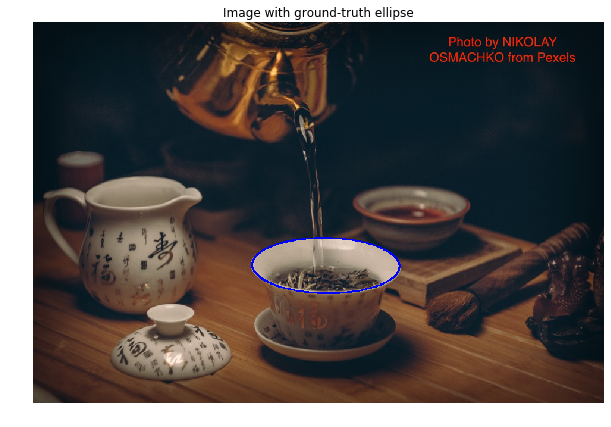

In [4]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url)
E_gt = np.array([[ 1, -0.085, -457.6],
                 [-0.085,  7.099, -2862.5],
                 [-457.6, -2862.5,  1381109.35]])
imshow(draw_ellipse(imgc, E_gt), title="Image with ground-truth ellipse")

### Get ellipse using 5 points (from lecture)

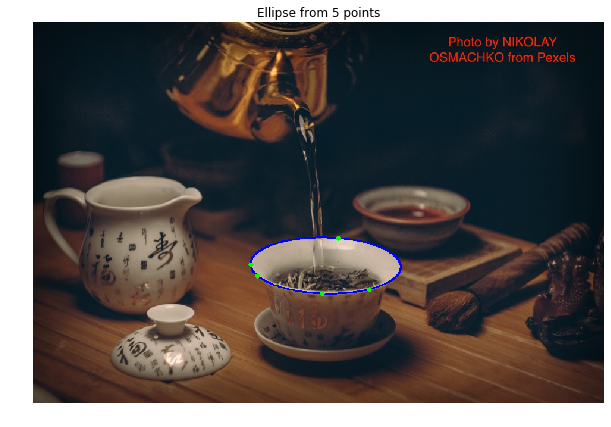

In [72]:
pts = np.array([[366, 407], [513, 363], [377, 426], [486, 456], [565, 449]], np.double)
num_pts = len(pts)

E = get_ellipse_from_5_points(pts, debug=False)
imshow(draw_pts(draw_ellipse(imgc, E, debug=False), pts), title="Ellipse from {} points".format(num_pts))

### Get ellips from >= 5 points with SVD

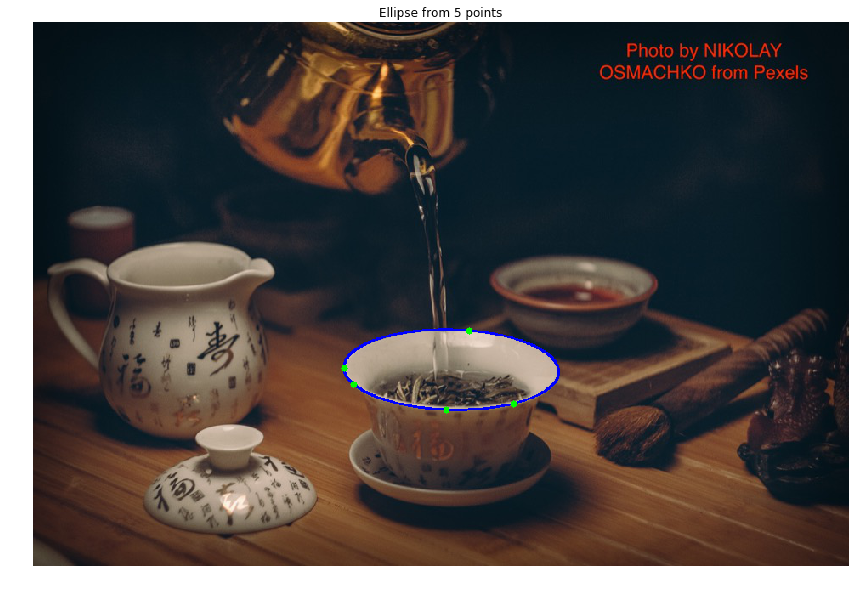

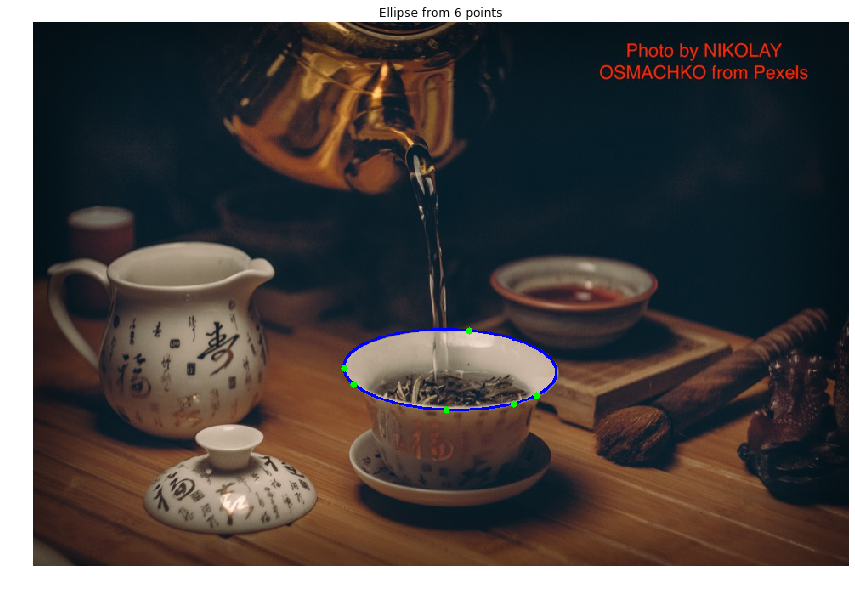

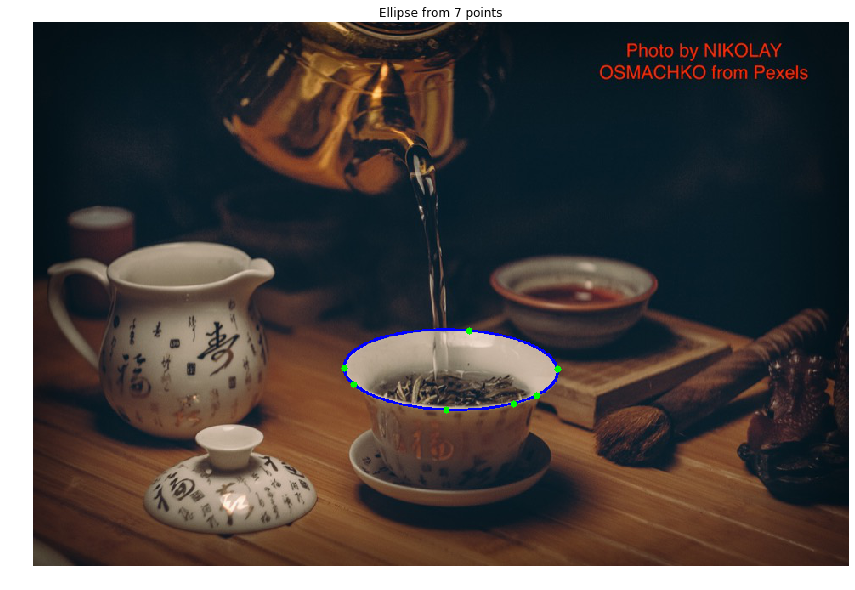

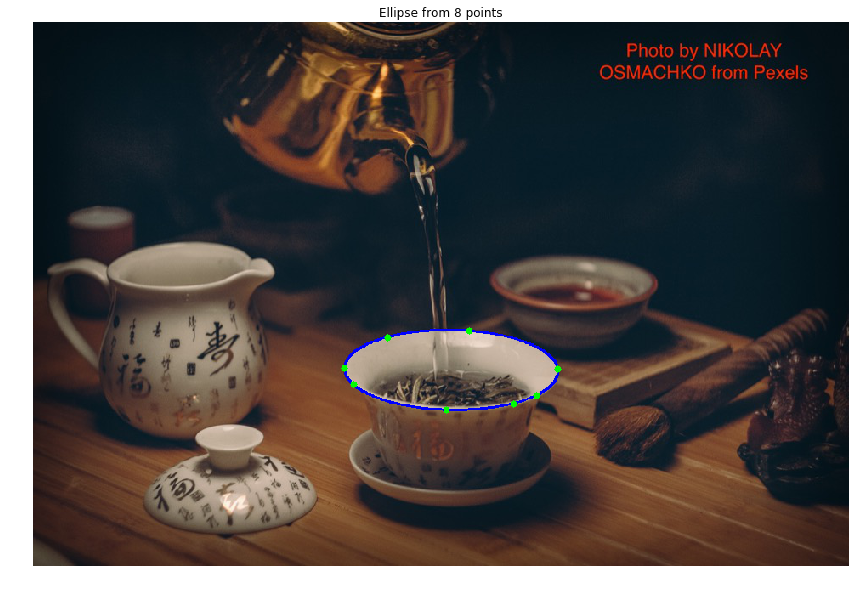

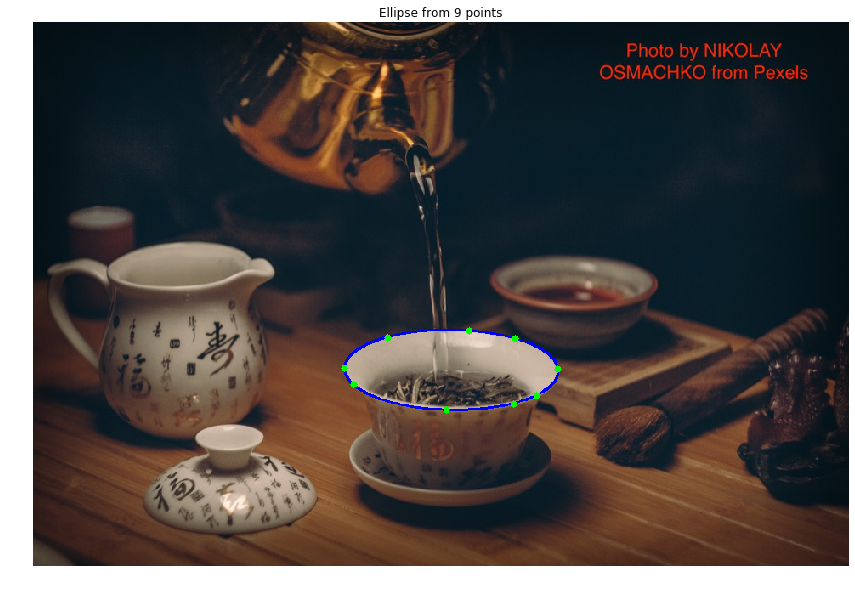

In [73]:
mpl.rcParams['figure.figsize'] = (20,10)
pts_max = np.array([[366, 407], [513, 363], [377, 426], [486, 456], [565, 449],
                    [592, 439], [617, 408], [417, 371], [567,372]], np.double)

for K in range(5, len(pts_max)+1):
    pts = pts_max[:K]
    num_pts = len(pts)
    E, _ = get_ellipse_from_points_svd(pts, debug=False)
    imshow(draw_pts(draw_ellipse(imgc, E, debug=False), pts), title="Ellipse from {} points".format(num_pts))
    plt.show()

### Noise stability experiments

In [73]:
E_pts_gt = get_ellipse_pts(E_gt)

Given 5 points
Visual examples of results:


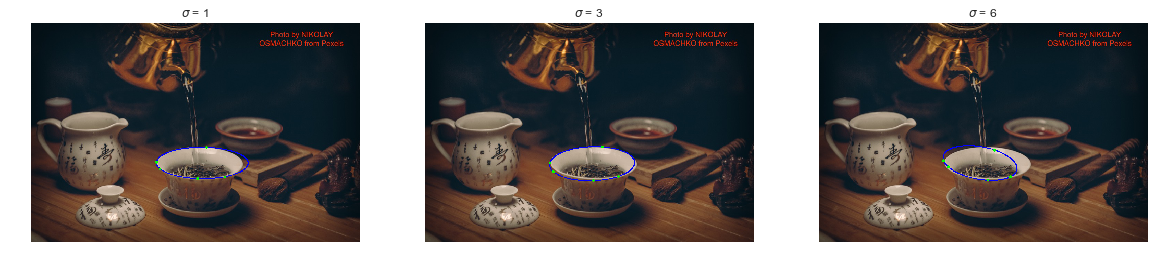

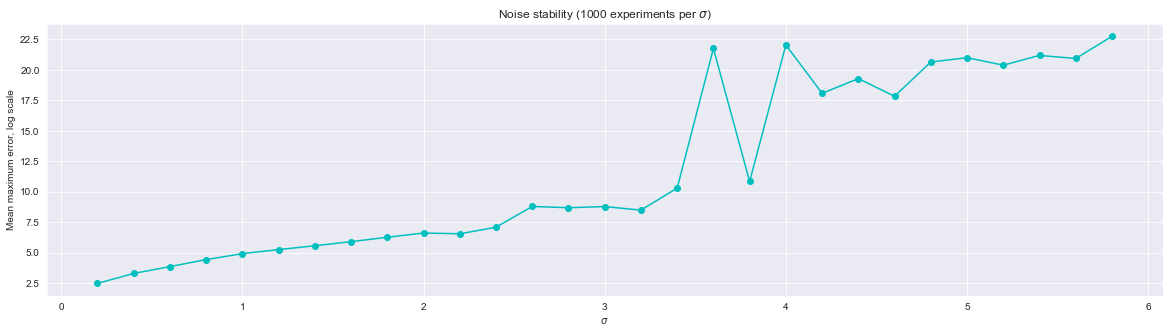

Given 6 points
Visual examples of results:


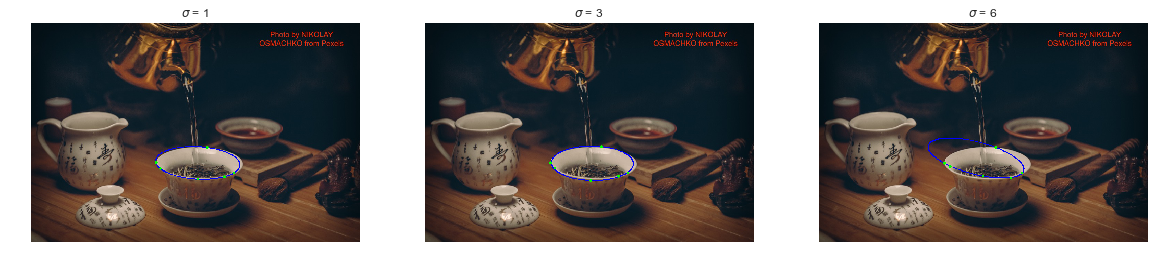

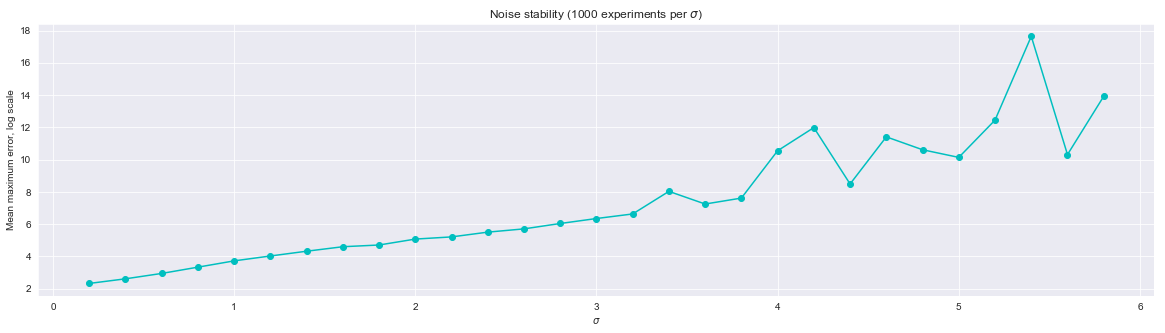

Given 7 points
Visual examples of results:


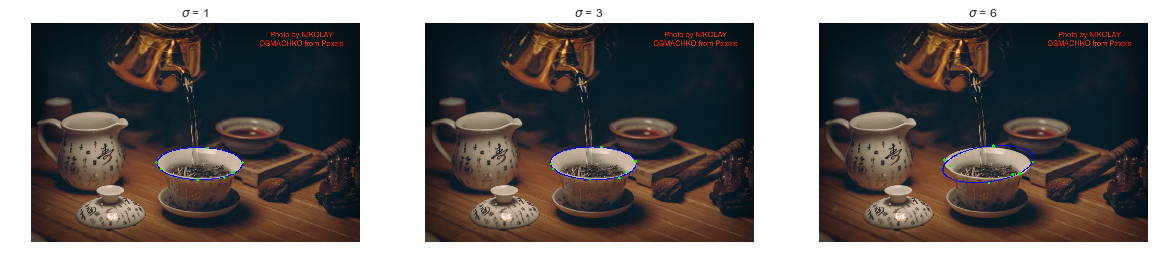

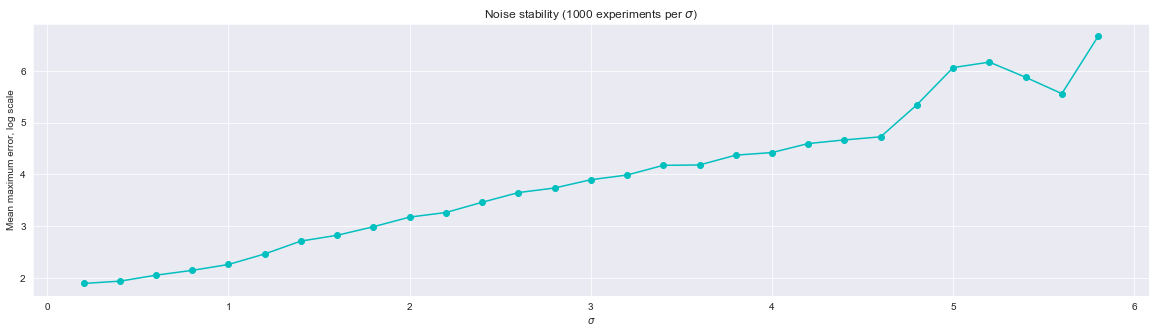

Given 8 points
Visual examples of results:


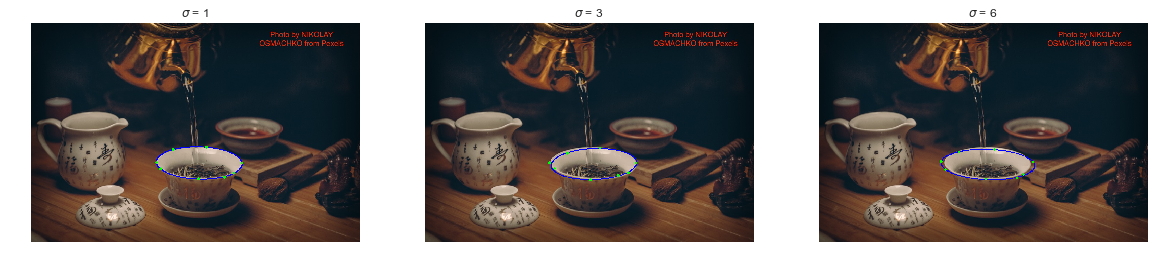

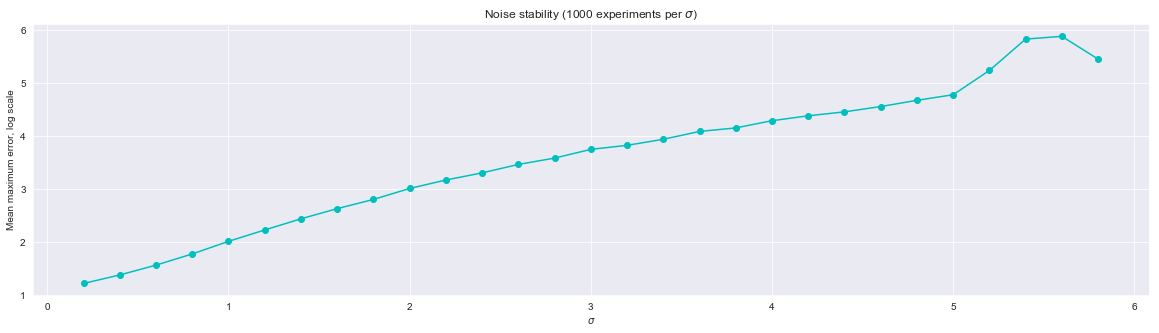

Given 9 points
Visual examples of results:


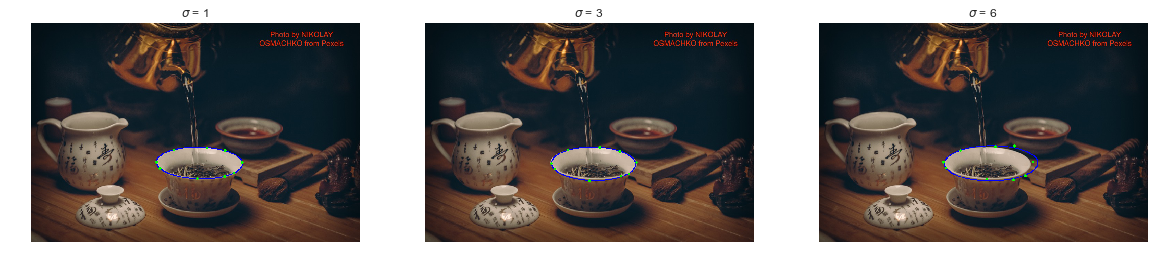

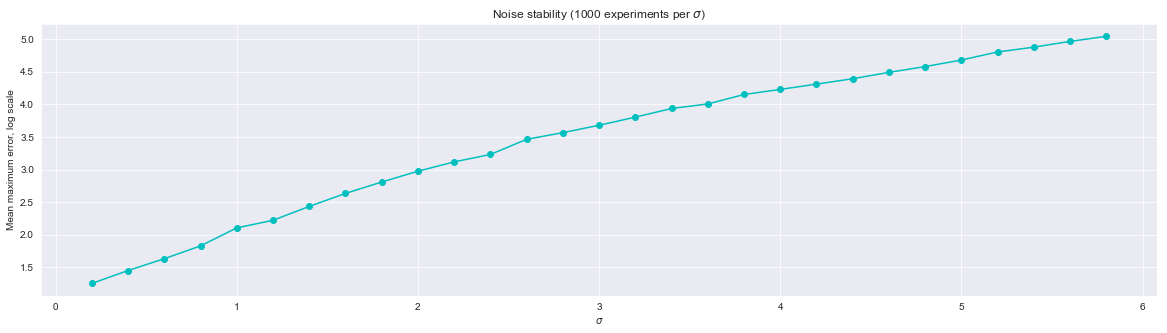

In [69]:
mpl.rcParams['figure.figsize'] = (20,5)
pts_max = np.array([[366, 407], [513, 363], [377, 426], [486, 456], [565, 449],
                    [592, 439], [617, 408], [417, 371], [567,372]], np.double)

n_experiments = 1000

for K in range(5, len(pts_max)+1):
    pts = pts_max[:K]
    num_pts = len(pts)
    print("Given", num_pts, "points")
    print("Visual examples of results:")
    for k, sigma in enumerate([1, 3, 6]):
        pts_noise = pts + np.random.randn(num_pts, 2) * sigma
        try:
            E, _ = get_ellipse_from_points_svd(pts_noise)
            imshow(draw_pts(draw_ellipse(imgc, E), pts_noise), sub=(1,3, k+1), title='$\sigma$ = {}'.format(sigma))
        except:
            pass
    plt.show()
    all_sigmas = np.arange(0.2, 6, 0.2)
    all_errors = np.zeros(all_sigmas.shape[0])
    for j, sigma in enumerate(all_sigmas):
        pts_noise_all = pts[None,:,:] + np.random.randn(n_experiments, num_pts, 2) * sigma
        errors = np.zeros(n_experiments)
        for i, pts_noise in enumerate(pts_noise_all):
            try:
                E, _ = get_ellipse_from_points_svd(pts_noise)
                assert (E[0,0] == 1) and (E_gt[0,0] == 1)
                E_pts = get_ellipse_pts(E)
                errors[i] = np.max((E_pts - E_pts_gt)**2)
            except:
                errors[i] = np.nan
                pass
            all_errors[j] = np.log(errors[~np.isnan(errors)].mean())
    plt.plot(all_sigmas, all_errors, 'co-')
    plt.title("Noise stability ({} experiments per $\sigma$)".format(n_experiments))
    plt.xlabel("$\sigma$")
    plt.ylabel("Mean maximum error, log scale")
    plt.show()

As one can see from plots, 6-point method is more stable than 5-point; 7-point method is much more stable; higher-order methods slightly increase stability.